In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import itertools
from math import ceil
import random
import warnings
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold
# from iterstrat.ml_stratifiers import MultilabelStratifiedKFold, MultilabelStratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import RobustScaler
import shap
# from pdpbox import pdp, get_dataset, info_plots

In [60]:
# drug_label = {'KANAMYCIN', 'CAPREOMYCIN', 'RIFAMPICIN', 'ETHIONAMIDE', 'ISONIAZID', 'OFLOXACIN', 'STREPTOMYCIN', 'ETHAMBUTOL', 'PROTHIONAMIDE', 'AMIKACIN', 'CIPROFLOXACIN', 'RIFABUTIN', 'PYRAZINAMIDE', 'MOXIFLOXACIN'}
# # drug_label = ['MOXIFLOXACIN']
# # CYCLOSERINE 'PARA-AMINOSALICYLIC ACID'  LEVOFLOXACIN 
# for drug in drug_label:

#     # dataset_columns = np.load("/htju/gaocl/result_exp/2_data/nu/single_feature2/"+drug+"_nuheader.npy", allow_pickle=True)
#     # # dataset_columns = np.append(dataset_columns,np.array(['label']))
#     # print("****************************************")
#     # #直接加载转变好的dataset
#     print(str(drug)+"   loader dataset ...")
    
#     # # dataset = pd.read_csv("./dataset_pff/data3/"+str(drug)+".csv")
#     # dd = np.load("/htju/gaocl/result_exp/2_data/nu/single_feature2/"+drug+"_nu.npy")
#     # dataset = pd.DataFrame(dd, columns=dataset_columns)
#     dataset = pd.read_csv("/htju/gaocl/result_exp/2_data/gene/single_feature/"+drug+".csv")



dataset = pd.read_csv("../2_data/gene/single_feature/ISONIAZID.csv")
X_data = dataset[dataset.columns[0:-1]]
# X_data = X_data.loc[:,~((X_data==0).all())]
print(X_data.shape)
label = dataset[dataset.columns[-1]]
# print(label.head())

(4728, 3693)


In [77]:
model = XGBClassifier()  #tree_method = 'gpu_hist'

In [78]:
model.fit(X_data, label)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [79]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_data)  # 传入特征矩阵X，计算SHAP值

In [65]:
shap_values

array([[-0.00368496,  0.00335318,  0.        , ...,  0.00112615,
        -0.00204838, -0.00190142],
       [-0.00422018, -0.00496098,  0.        , ...,  0.00130173,
        -0.00087436, -0.00162083],
       [-0.00422018, -0.02006652,  0.        , ...,  0.00656003,
        -0.00087436, -0.00162083],
       ...,
       [-0.00375993, -0.00208925,  0.        , ...,  0.00107666,
        -0.0029486 , -0.00083066],
       [-0.00301394,  0.01557761,  0.        , ...,  0.00656759,
         0.00142651, -0.0016008 ],
       [-0.00369798,  0.00438421,  0.        , ...,  0.00126758,
         0.00185848, -0.00097894]], dtype=float32)

In [25]:
# 可视化第一个prediction的解释   如果不想用JS,传入matplotlib=True
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_data.iloc[0,:])

In [20]:
# 多个预测的解释
# 如果对多个样本进行解释，将上述形式旋转90度然后水平并排放置，我们可以看到整个数据集的explanations ：

In [66]:
explainer.expected_value

-0.883195

In [74]:
# 可视化解释性 (use matplotlib=True to avoid Javascript)
shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values, X_data,matplotlib=True, show=False)
# 前1000个样本的shap累计解释，可选择坐标内容
shap.force_plot(explainer.expected_value, shap_values[:100,:30], X_data.iloc[:100,:30])
# plt.savefig("../4_data/force_plot.png")
# plt.show()

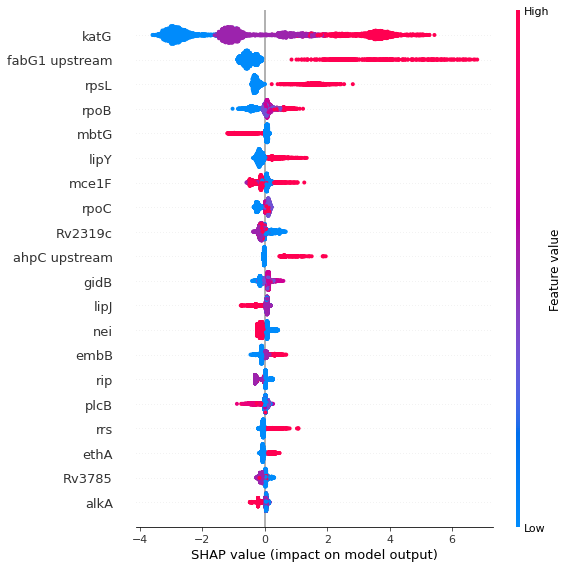

In [32]:
# summarize the effects of all the features
fig = shap.summary_plot(shap_values, X_data, matplotlib=True,show=False)  #, save=True,path='../4_data/shap_multi_gene.png'
plt.savefig("../4_data/summarizeAllFeatures.png")

In [24]:
# # 比如我们挑选数据集中的第30位
# j = 30
# player_explainer = pd.DataFrame()
# player_explainer['feature'] = cols
# player_explainer['feature_value'] = data[cols].iloc[j].values
# player_explainer['shap_value'] = shap_values[j]
# player_explainer

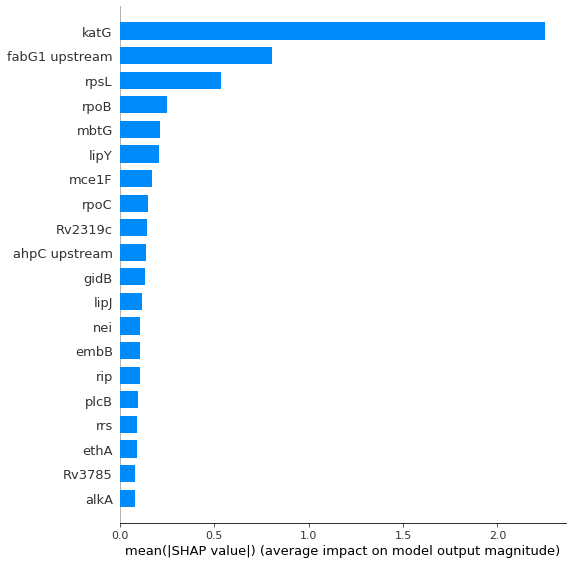

In [27]:
shap.summary_plot(shap_values, X_data, plot_type="bar")

In [1]:
shap_interaction_values = explainer.shap_interaction_values(X_data)
shap.summary_plot(shap_interaction_values, X_data)
plt.savefig(f"../4_data/shap_interaction.png")

NameError: name 'explainer' is not defined

MOXIFLOXACIN   loader dataset ...
(1213, 3654)


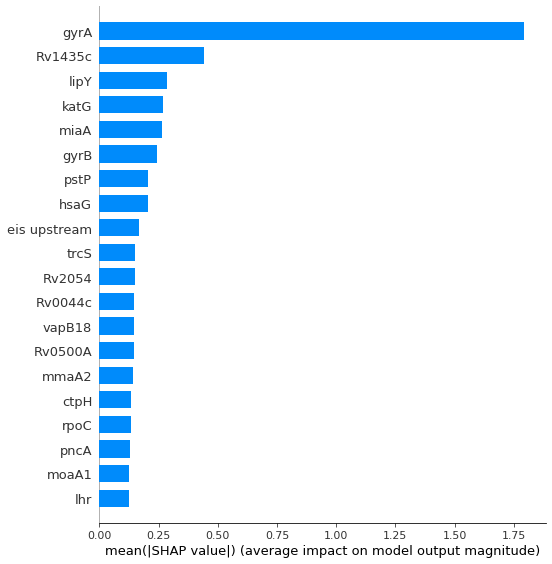

AMIKACIN   loader dataset ...
(1403, 3671)


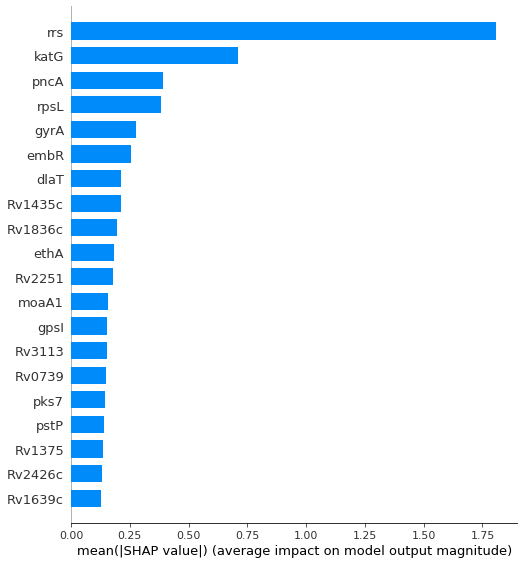

RIFAMPICIN   loader dataset ...
(4718, 3694)


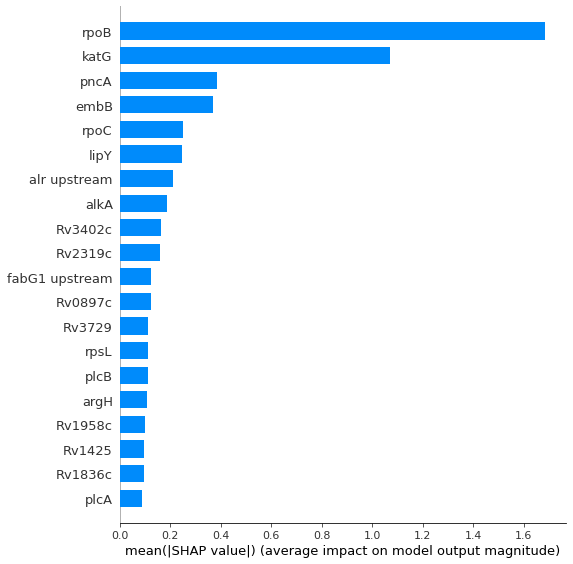

PYRAZINAMIDE   loader dataset ...
(4252, 3692)


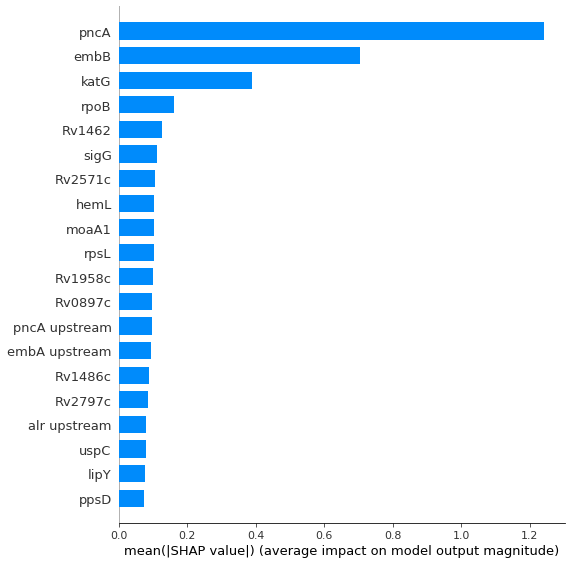

ETHAMBUTOL   loader dataset ...
(77, 3541)


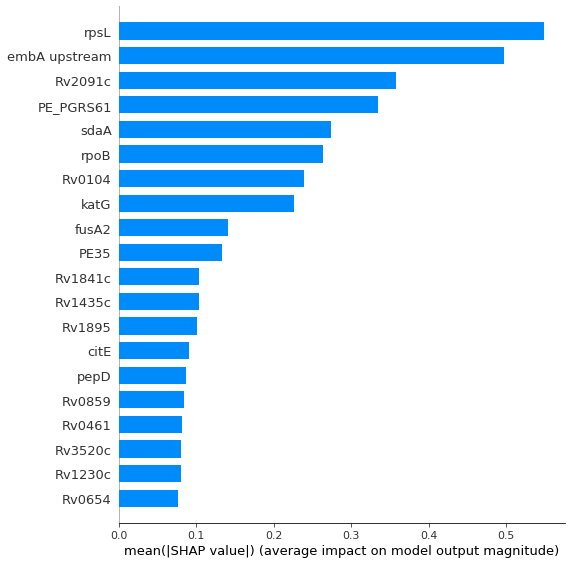

ISONIAZID   loader dataset ...
(4728, 3693)


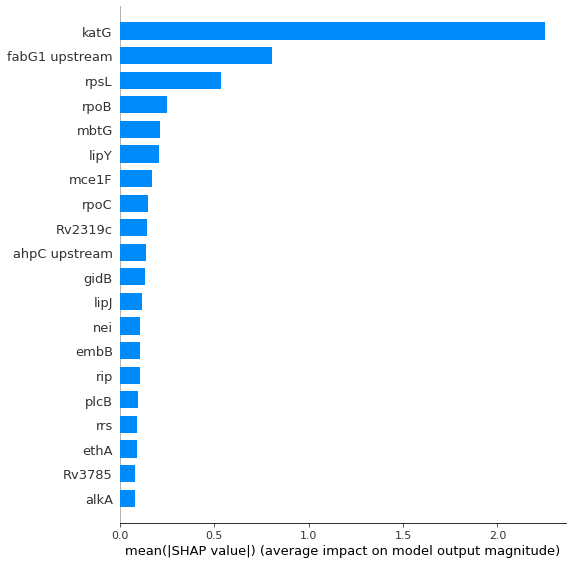

CIPROFLOXACIN   loader dataset ...
(358, 3614)


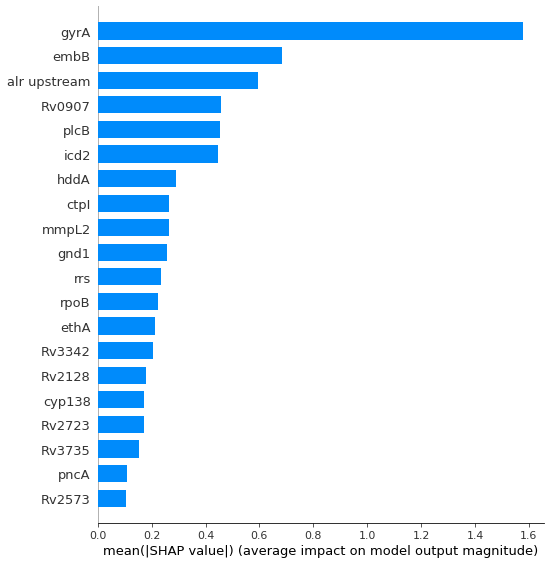

KANAMYCIN   loader dataset ...
(1168, 3671)


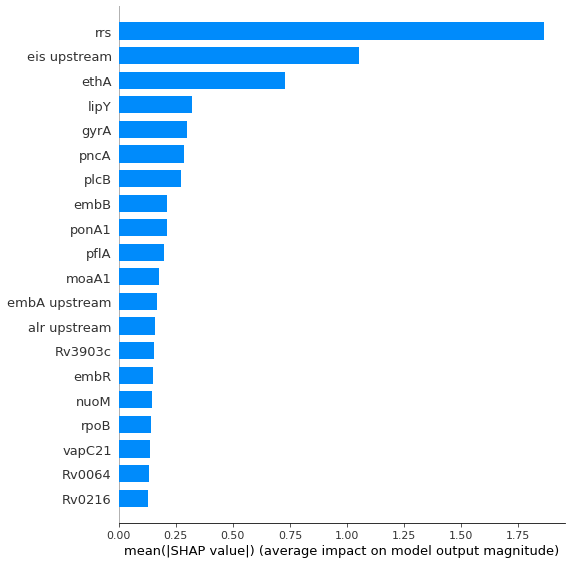

OFLOXACIN   loader dataset ...
(1915, 3676)


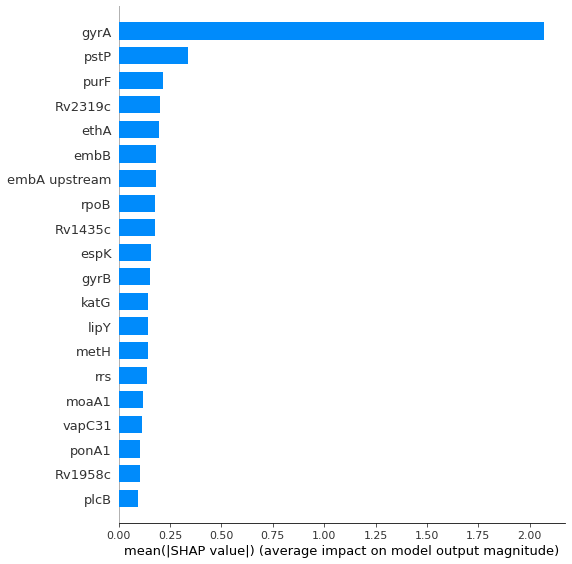

STREPTOMYCIN   loader dataset ...
(2767, 3687)


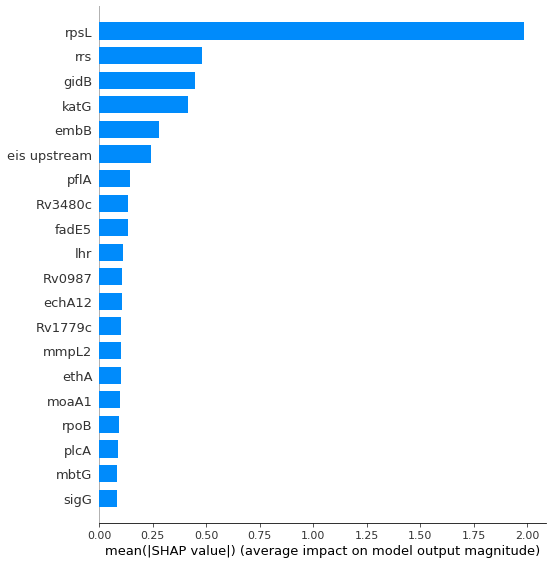

CAPREOMYCIN   loader dataset ...
(1652, 3674)


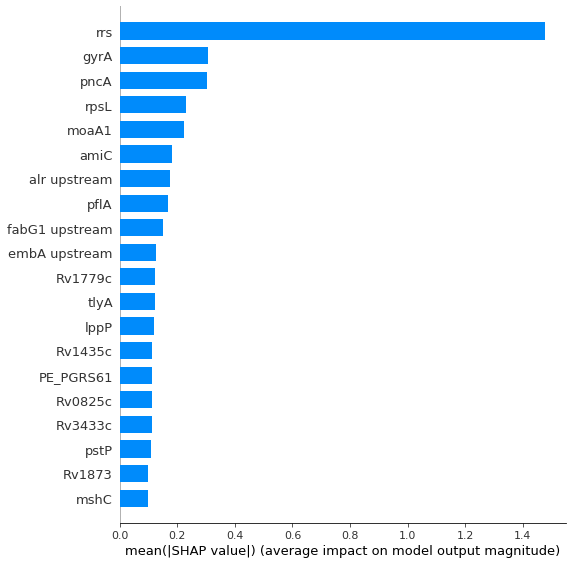

RIFABUTIN   loader dataset ...
(106, 3527)


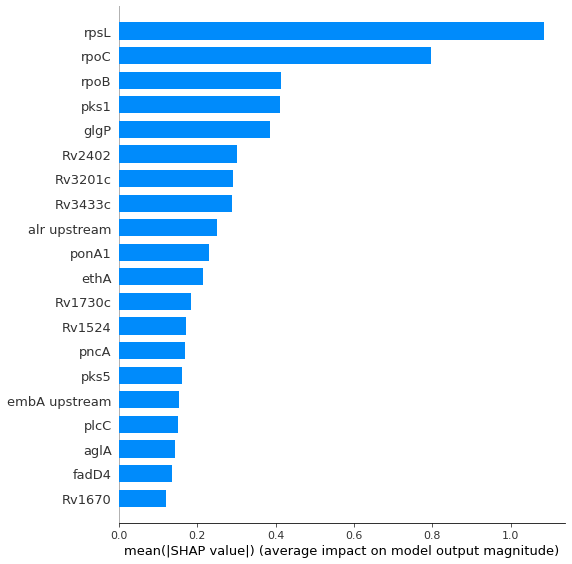

PROTHIONAMIDE   loader dataset ...
(495, 3262)


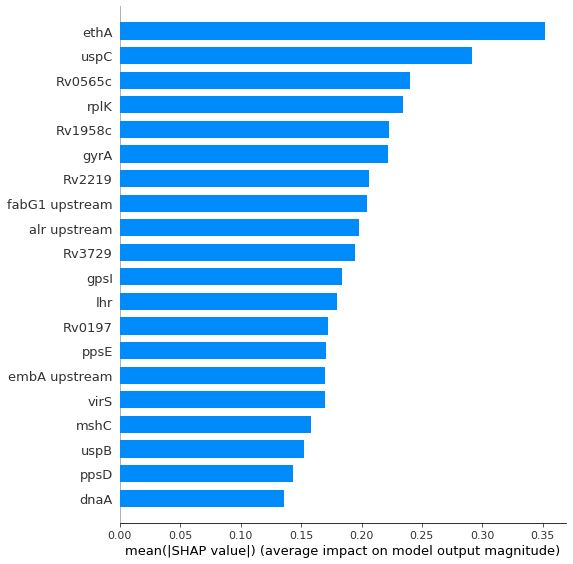

ETHIONAMIDE   loader dataset ...
(779, 3659)


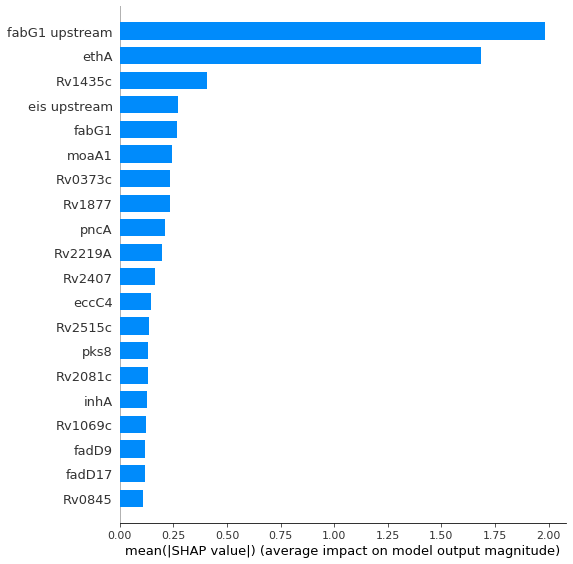

In [37]:
drug_label = {'KANAMYCIN', 'CAPREOMYCIN', 'RIFAMPICIN', 'ETHIONAMIDE', 'ISONIAZID', 'OFLOXACIN', 'STREPTOMYCIN', 'ETHAMBUTOL', 'PROTHIONAMIDE', 'AMIKACIN', 'CIPROFLOXACIN', 'RIFABUTIN', 'PYRAZINAMIDE', 'MOXIFLOXACIN'}

for drug in drug_label:
    print(str(drug)+"   loader dataset ...")
    
    dataset = pd.read_csv("../2_data/gene/single_feature/"+drug+".csv")
    X_data = dataset[dataset.columns[0:-1]]
    # X_data = X_data.loc[:,~((X_data==0).all())]
    print(X_data.shape)
    label = dataset[dataset.columns[-1]]
    # print(label.head())
    model = XGBClassifier(tree_method = 'gpu_hist')
    model.fit(X_data, label)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)  # 传入特征矩阵X，计算SHAP值
    
    np.save(f"../4_data/gene/single/shapeval_"+str(drug)+".npy", shap_values)
    
#     fig = shap.summary_plot(shap_values, X_data, show=False)  #, save=True,path='../4_data/shap_multi_gene.png'
#     plt.savefig(f"../4_data/gene/single/summarize{drug}.png")
#     plt.show()
    fig = shap.summary_plot(shap_values, X_data, plot_type="bar",show=False)
    plt.savefig(f"../4_data/gene/single/imp_{drug}.png")
    plt.show()

In [ ]:
drug_label = {'KANAMYCIN', 'CAPREOMYCIN', 'RIFAMPICIN', 'ETHIONAMIDE', 'ISONIAZID', 'OFLOXACIN', 'STREPTOMYCIN', 'ETHAMBUTOL', 'PROTHIONAMIDE', 'AMIKACIN', 'CIPROFLOXACIN', 'RIFABUTIN', 'PYRAZINAMIDE', 'MOXIFLOXACIN'}

for drug in drug_label:
    print(str(drug)+"   loader dataset ...")
    
    dataset = pd.read_csv("../2_data/nu/single_feature/"+drug+".csv")
    X_data = dataset[dataset.columns[0:-1]]
    # X_data = X_data.loc[:,~((X_data==0).all())]
    print(X_data.shape)
    label = dataset[dataset.columns[-1]]
    # print(label.head())
    model = XGBClassifier(tree_method = 'gpu_hist')
    model.fit(X_data, label)
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data)  # 传入特征矩阵X，计算SHAP值
    
    np.save(f"../4_data/nu/single/shapeval_"+str(drug)+".npy", shap_values)
    
#     fig = shap.summary_plot(shap_values, X_data, show=False)  #, save=True,path='../4_data/shap_multi_gene.png'
#     plt.savefig(f"../4_data/nu/single/summarize{drug}.png")
#     plt.show()
    fig = shap.summary_plot(shap_values, X_data, plot_type="bar",show=False)
    plt.savefig(f"../4_data/nu/single/imp_{drug}.png")
    plt.show()

In [6]:
drug = ['ISONIAZID','RIFAMPICIN','ETHAMBUTOL','PYRAZINAMIDE']

In [7]:
gene_muti = pd.read_csv("../2_data/gene/multi_feature/MDRv2.csv")

In [8]:
label = gene_muti[drug]
X_data = gene_muti.drop(drug, axis =1)

In [18]:
X_data

,Rv2959c,gpdA2,Rv0633c,Rv0919,Rv0802c,Rv2628,Rv0448c,fadA5,rpmA,cyp132,...,Rv1725c,sirR,Rv0790c,rpmF,Rv1276c,Rv0313,Rv2553c,PE,clp6,35kd
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,1,0
1,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,2,0
2,1,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,3,2,0
3,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,2,0
4,0,1,0,1,0,0,0,0,0,1,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,2,0
4141,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,2,2,0
4142,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4143,0,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0


In [22]:
model = OneVsRestClassifier(XGBClassifier(tree_method='gpu_hist'))
model.fit(X_data,label)

X_train_summary = shap.kmeans(X_data, 10)

def model_predict(data_asarray):
    data_asframe =  pd.DataFrame(data_asarray, columns=X_data.columns)
    return model.predict(data_asframe)


explainer = shap.KernelExplainer(model_predict, X_train_summary,)
shap_values = explainer.shap_values(X_data)  # 传入特征矩阵X，计算SHAP值

KeyboardInterrupt: 

### gene explain

In [37]:
drug_label = {'KANAMYCIN', 'CAPREOMYCIN', 'RIFAMPICIN', 'ETHIONAMIDE', 'ISONIAZID', 'OFLOXACIN', 'STREPTOMYCIN', 'ETHAMBUTOL', 'PROTHIONAMIDE', 'AMIKACIN', 'CIPROFLOXACIN', 'RIFABUTIN', 'PYRAZINAMIDE', 'MOXIFLOXACIN'}

for drug in drug_label:
    tmp_df = {}
    print(str(drug)+"   loader dataset ...")
    
    dataset = pd.read_csv(f"../2_data/gene/single_feature/{drug}.csv")
    X_data = dataset[dataset.columns[0:-1]]
    shap_values = np.load(f"../4_data/gene/single/shapeval_{drug}.npy")
    print(X_data.shape, shap_values.shape)
    print(len(X_data.columns))
    player_explainer = pd.DataFrame()
    for j in range(len(X_data.columns)):
#         print(X_data.columns[j])
        tmp_df['feature'] = X_data.columns[j]
        tmp_df['shap_value'] = np.mean(np.abs(shap_values[:,j]))
        player_explainer = player_explainer.append(pd.Series(tmp_df),ignore_index=True)
    player_explainer = player_explainer.sort_values( by = 'shap_value',ascending = False)
    
    player_explainer.to_csv(f"../4_data/gene/single/{drug}.csv", index = False)

ISONIAZID   loader dataset ...
(4728, 3693) (4728, 3693)
3693
STREPTOMYCIN   loader dataset ...
(2767, 3687) (2767, 3687)
3687
RIFABUTIN   loader dataset ...
(106, 3527) (106, 3527)
3527
RIFAMPICIN   loader dataset ...
(4718, 3694) (4718, 3694)
3694
KANAMYCIN   loader dataset ...
(1168, 3671) (1168, 3671)
3671
CAPREOMYCIN   loader dataset ...
(1652, 3674) (1652, 3674)
3674
ETHIONAMIDE   loader dataset ...
(779, 3659) (779, 3659)
3659
MOXIFLOXACIN   loader dataset ...
(1213, 3654) (1213, 3654)
3654
OFLOXACIN   loader dataset ...
(1915, 3676) (1915, 3676)
3676
CIPROFLOXACIN   loader dataset ...
(358, 3614) (358, 3614)
3614
PYRAZINAMIDE   loader dataset ...
(4252, 3692) (4252, 3692)
3692
AMIKACIN   loader dataset ...
(1403, 3671) (1403, 3671)
3671
ETHAMBUTOL   loader dataset ...
(77, 3541) (77, 3541)
3541
PROTHIONAMIDE   loader dataset ...
(495, 3262) (495, 3262)
3262


In [27]:
# drug_label = {'KANAMYCIN', 'CAPREOMYCIN', 'RIFAMPICIN', 'ETHIONAMIDE', 'ISONIAZID', 'OFLOXACIN', 'STREPTOMYCIN', 'ETHAMBUTOL', 'PROTHIONAMIDE', 'AMIKACIN', 'CIPROFLOXACIN', 'RIFABUTIN', 'PYRAZINAMIDE', 'MOXIFLOXACIN'}

# for drug in drug_label:
#     player_explainer = pd.read_csv(f"../4_data/gene/single/{drug}.csv")
#     player_explainer = player_explainer.sort_values( by = 'shap_value',ascending = False)
    
#     player_explainer.to_csv(f"../4_data/gene/single/{drug}.csv", index = False)

In [ ]:
drug_label = {'KANAMYCIN', 'CAPREOMYCIN', 'RIFAMPICIN', 'ETHIONAMIDE', 'ISONIAZID', 'OFLOXACIN', 'STREPTOMYCIN', 'ETHAMBUTOL', 'PROTHIONAMIDE', 'AMIKACIN', 'CIPROFLOXACIN', 'RIFABUTIN', 'PYRAZINAMIDE', 'MOXIFLOXACIN'}

for drug in drug_label:
    tmp_df = {}
    print(str(drug)+"   loader dataset ...")
    
    dataset = pd.read_csv(f"../2_data/nu/single_feature/{drug}.csv")
    X_data = dataset[dataset.columns[0:-1]]
    shap_values = np.load(f"../4_data/nu/single2/shapeval_{drug}.npy")
    print(X_data.shape, shap_values.shape)
    print(len(X_data.columns))
    player_explainer = pd.DataFrame()
    for j in range(len(X_data.columns)):
#         print(X_data.columns[j])
        tmp_df['feature'] = X_data.columns[j]
        tmp_df['shap_value'] = np.mean(shap_values[:,j])
        player_explainer = player_explainer.append(pd.Series(tmp_df),ignore_index=True)
    player_explainer = player_explainer.sort_values( by = 'shap_value',ascending = False)
    
    player_explainer.to_csv(f"../4_data/nu/single2/{drug}.csv", index = False)

In [2]:
impt = ['weight', 'cover', 'gain', 'total_gain', 'total_cover']

drug = ['AMIKACIN',
 'CAPREOMYCIN',
 'CIPROFLOXACIN',
 'ETHAMBUTOL',
 'ETHIONAMIDE',
 'ISONIAZID',
 'KANAMYCIN',
 'MOXIFLOXACIN',
 'OFLOXACIN',
 'PROTHIONAMIDE',
 'PYRAZINAMIDE',
 'RIFABUTIN',
 'RIFAMPICIN',
 'STREPTOMYCIN']

In [ ]:
drug = ['AMIKACIN',
 'CAPREOMYCIN',
 'CIPROFLOXACIN',
 'ETHAMBUTOL',
 'ETHIONAMIDE',
 'ISONIAZID',
 'KANAMYCIN',
 'MOXIFLOXACIN',
 'OFLOXACIN',
 'PROTHIONAMIDE',
 'PYRAZINAMIDE',
 'RIFABUTIN',
 'RIFAMPICIN',
 'STREPTOMYCIN']

In [42]:
res1 = pd.DataFrame()
# drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/perimp/gene/single/"
for i, d in enumerate(drug):
    dt = {}
    print(d)
    df = pd.read_csv(path+str(d)+"_xgb.csv")[:10]
    ans1 = set(df.feature.values)
    df2 = pd.read_csv(f"../4_data/gene/single/{d}.csv")[:10]
#     print(df2)
    ans2 = set(df2.feature.values)
    dt["pert&shap"] = len(ans1 & ans2)
    
    res1 = res1.append(pd.Series(dt, name=d))
# plt.tight_layout()
# plt.savefig(path+"fisrtdrug.png", bbox_inches='tight',dpi=300)
plt.show()
res1

AMIKACIN
CAPREOMYCIN
CIPROFLOXACIN
ETHAMBUTOL
ETHIONAMIDE
ISONIAZID
KANAMYCIN
MOXIFLOXACIN
OFLOXACIN
PROTHIONAMIDE
PYRAZINAMIDE
RIFABUTIN
RIFAMPICIN
STREPTOMYCIN


,pert&shap
AMIKACIN,6.0
CAPREOMYCIN,7.0
CIPROFLOXACIN,5.0
ETHAMBUTOL,3.0
ETHIONAMIDE,6.0
ISONIAZID,7.0
KANAMYCIN,5.0
MOXIFLOXACIN,6.0
OFLOXACIN,5.0
PROTHIONAMIDE,5.0


pert&shap
[6. 7. 5. 3. 6. 7. 5. 6. 5. 5. 7. 7. 7. 7.]


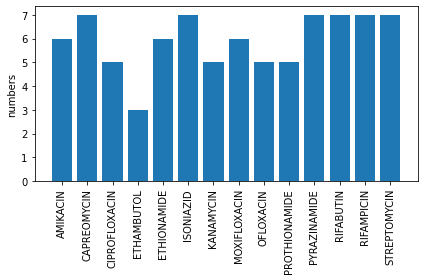

In [106]:
barx = np.arange(len(drug))   # x坐标
# width = 0; wid = 0.1
label_y = res1.columns.values[0]
print(label_y)
print(res1[label_y].values)
# plt.figure(figsize=(18,9))
# for i in range(len(impt)):  # 遍历每个yj的系数
#     plt.bar(barx+width, res.iloc[:, i], width=wid, label=label_y[i])
#     width += wid            # 
plt.bar(barx, res1[label_y].values, label=label_y)
plt.xticks(range(len(drug)), drug)
plt.ylabel("numbers")
plt.xticks(rotation=90)
# plt.legend()
plt.tight_layout()
plt.savefig("pert&shap&gene.png", bbox_inches='tight',dpi=300)
plt.show()

In [99]:
res4 = pd.DataFrame()
# drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/perimp/nu/single/"
for i, d in enumerate(drug):
    dt = {}
    print(d)
    df = pd.read_csv(path+str(d)+"_xgb_perm.csv")[:10]
    ans1 = set(df.feature.values)
    df2 = pd.read_csv(f"../4_data/nu/single2/{d}.csv")[:10]
#     print(df2)
    ans2 = set(df2.feature.values)
    dt["pert&shap"] = len(ans1 & ans2)
    
    res4 = res4.append(pd.Series(dt, name=d))
# plt.tight_layout()
# plt.savefig("pert&shap&nu.png", bbox_inches='tight',dpi=300)

res4

AMIKACIN
CAPREOMYCIN
CIPROFLOXACIN
ETHAMBUTOL
ETHIONAMIDE
ISONIAZID
KANAMYCIN
MOXIFLOXACIN
OFLOXACIN
PROTHIONAMIDE
PYRAZINAMIDE
RIFABUTIN
RIFAMPICIN
STREPTOMYCIN


,pert&shap
AMIKACIN,5.0
CAPREOMYCIN,5.0
CIPROFLOXACIN,5.0
ETHAMBUTOL,8.0
ETHIONAMIDE,7.0
ISONIAZID,6.0
KANAMYCIN,6.0
MOXIFLOXACIN,2.0
OFLOXACIN,6.0
PROTHIONAMIDE,2.0


pert&shap
[5. 5. 5. 8. 7. 6. 6. 2. 6. 2. 8. 4. 7. 6.]


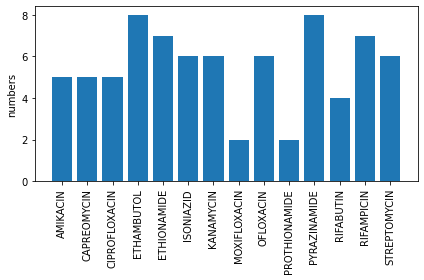

In [107]:
barx = np.arange(len(drug))   # x坐标
# width = 0; wid = 0.1
label_y = res1.columns.values[0]
print(label_y)
print(res4[label_y].values)
# plt.figure(figsize=(18,9))
# for i in range(len(impt)):  # 遍历每个yj的系数
#     plt.bar(barx+width, res.iloc[:, i], width=wid, label=label_y[i])
#     width += wid            # 
plt.bar(barx, res4[label_y].values, label=label_y)
plt.xticks(range(len(drug)), drug)
plt.ylabel("numbers")
# plt.xlabel(figsize=12)
# plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("pert&shap&nu.png", bbox_inches='tight',dpi=300)
plt.show()

In [88]:
res2 = pd.DataFrame()
# drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/perimp/gene/single/"
for i, d in enumerate(drug):
    dt = {}
    df = pd.read_csv(f"../4_data/gene/single/{d}.csv")[:10]
    ans1 = set(df.feature.values)
    for pt in impt:
        df2 = pd.read_csv(f"../3_data/featimp/imptype/gene/xgb_{pt}_{d}.csv")[:10]
        ans2 = set(df2.feature.values)
        dt[f"shap&{pt}"] = len(ans1 & ans2)
    res2 = res2.append(pd.Series(dt, name=d))
# plt.tight_layout()
# plt.savefig(path+"fisrtdrug.png", bbox_inches='tight',dpi=300)
# plt.show()
res2

,shap&cover,shap&gain,shap&total_cover,shap&total_gain,shap&weight
AMIKACIN,0.0,3.0,5.0,5.0,7.0
CAPREOMYCIN,0.0,2.0,6.0,7.0,6.0
CIPROFLOXACIN,1.0,4.0,4.0,6.0,5.0
ETHAMBUTOL,6.0,5.0,7.0,7.0,7.0
ETHIONAMIDE,0.0,1.0,6.0,5.0,6.0
ISONIAZID,0.0,3.0,8.0,5.0,4.0
KANAMYCIN,0.0,3.0,6.0,5.0,7.0
MOXIFLOXACIN,1.0,1.0,7.0,4.0,3.0
OFLOXACIN,2.0,2.0,5.0,6.0,5.0
PROTHIONAMIDE,1.0,0.0,5.0,5.0,4.0


In [89]:
# [6. 7. 5. 3. 6. 7. 5. 6. 5. 5. 7. 7. 7. 7.]

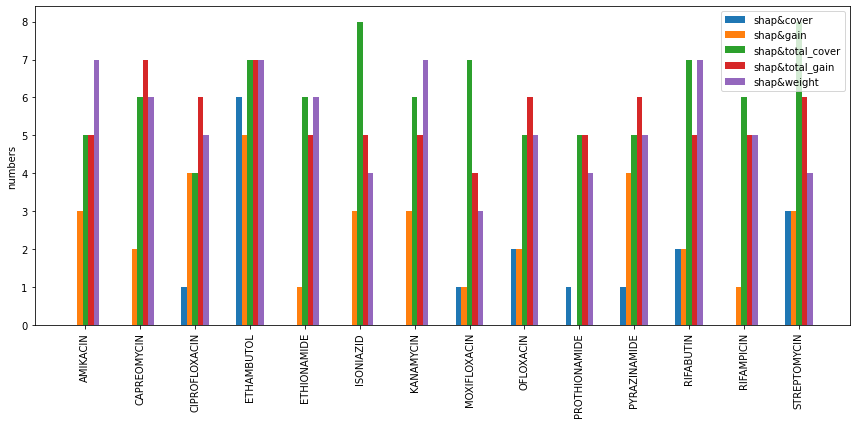

In [111]:
barx = np.arange(len(drug))-0.2    # x坐标
width = 0; wid = 0.1
label_y = res2.columns

plt.figure(figsize=(12,6))
for i in range(len(impt)):  # 遍历每个yj的系数
    plt.bar(barx+width, res2.iloc[:, i], width=wid, label=label_y[i])
    width += wid            # 
plt.xticks(range(len(drug)), drug)
plt.ylabel("numbers")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("pert&impt&gene.png", bbox_inches='tight',dpi=300)
plt.show()

In [11]:
res3 = pd.DataFrame()
# drug = ['ISONIAZID', 'RIFAMPICIN', 'ETHAMBUTOL', 'PYRAZINAMIDE']
path  = "../3_data/perimp/nu/single/"
for i, d in enumerate(drug):
    dt = {}
    df = pd.read_csv(f"../4_data/nu/single2/{d}.csv")[:10]
    ans1 = set(df.feature.values)
    for pt in impt:
        df2 = pd.read_csv(f"../3_data/featimp/imptype/nu/xgb_{pt}_{d}.csv")[:10]
        ans2 = set(df2.feature.values)
        dt[f"shap&{pt}"] = len(ans1 & ans2)
    res3 = res3.append(pd.Series(dt, name=d))
# plt.tight_layout()
# plt.savefig(path+"fisrtdrug.png", bbox_inches='tight',dpi=300)
# plt.show()
res3

,shap&cover,shap&gain,shap&total_cover,shap&total_gain,shap&weight
AMIKACIN,0.0,2.0,4.0,5.0,4.0
CAPREOMYCIN,0.0,1.0,3.0,3.0,5.0
CIPROFLOXACIN,1.0,2.0,3.0,3.0,7.0
ETHAMBUTOL,2.0,4.0,7.0,8.0,7.0
ETHIONAMIDE,0.0,1.0,5.0,6.0,7.0
ISONIAZID,2.0,3.0,4.0,6.0,5.0
KANAMYCIN,5.0,6.0,7.0,7.0,5.0
MOXIFLOXACIN,1.0,2.0,3.0,3.0,3.0
OFLOXACIN,5.0,5.0,5.0,5.0,5.0
PROTHIONAMIDE,0.0,0.0,3.0,5.0,3.0


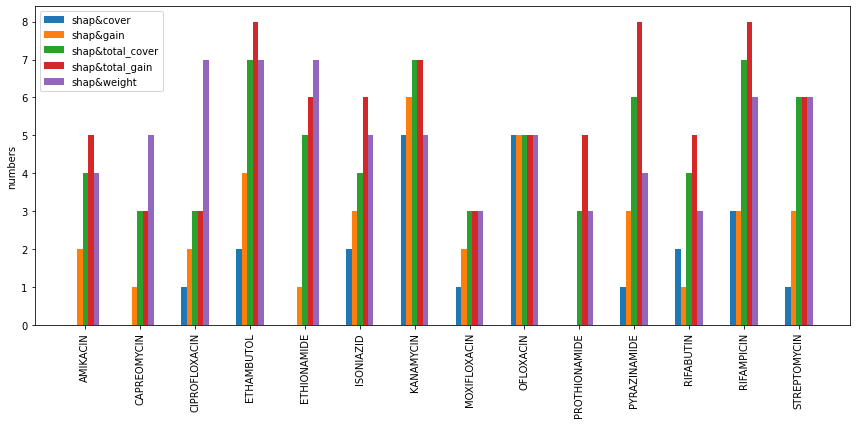

In [13]:
barx = np.arange(len(drug))-0.2    # x坐标
width = 0; wid = 0.1
label_y = res3.columns

plt.figure(figsize=(12,6))
for i in range(len(impt)):  # 遍历每个yj的系数
    plt.bar(barx+width, res3.iloc[:, i], width=wid, label=label_y[i])
    width += wid            # 
plt.xticks(range(len(drug)), drug)
plt.ylabel("numbers")
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("pert&impt&nu.png", bbox_inches='tight',dpi=300)
plt.show()

In [86]:
# [5. 5. 5. 8. 7. 6. 6. 2. 6. 2. 8. 4. 7. 6.]